In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 300, centers = 4, random_state = 0, cluster_std = 1.0)

In [3]:
def visualize_classifier(model, X, y, ax = None, cmap = 'rainbow'):
    ax = ax or plt.gca()
    
    #Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = cmap, clim = (y.min(), y.max()), zorder = 3)
    ax.axis('tight')
    ax.axis('off')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num = 200), np.linspace(*ylim, num = 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    #create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3, levels = np.arange(n_classes + 1) - 0.5, cmap = cmap,
                          clim = (y.min(), y.max()), zorder = 1)
    ax.set(xlim = xlim, ylim = ylim);

In [4]:
from sklearn.ensemble import RandomForestClassifier

<ipython-input-3-1269919cf9b6>:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha = 0.3, levels = np.arange(n_classes + 1) - 0.5, cmap = cmap,


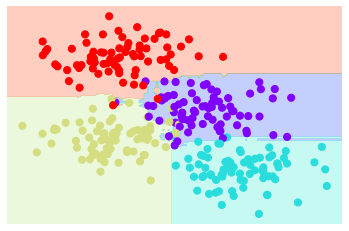

In [5]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
visualize_classifier(model, X, y);

In [6]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

In [7]:
def model(x, sigma = 0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

In [8]:
y = model(x)

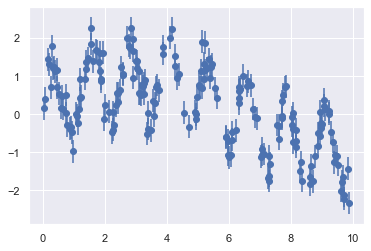

In [9]:
plt.errorbar(x, y, 0.3, fmt = 'o');

In [10]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

RandomForestRegressor(n_estimators=200)

In [11]:
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])

ytrue = model(xfit, sigma = 0)

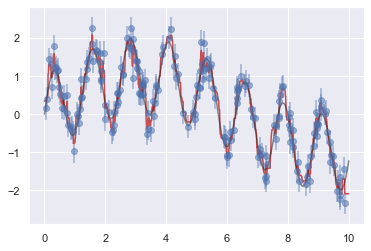

In [12]:
plt.errorbar(x, y, 0.3, fmt = 'o', alpha = 0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha = 0.5);

In [13]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

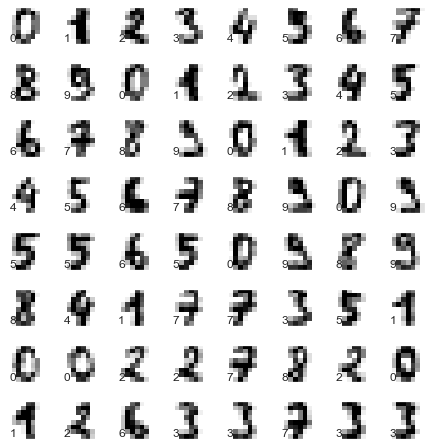

In [14]:
fig = plt.figure(figsize = (6, 6))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.5, wspace = 0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    
    ax.text(0, 7, (digits.target[i]))

In [15]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state = 0)

In [16]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(Xtrain, ytrain)

RandomForestClassifier()

In [17]:
ypred = model.predict(Xtest)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      1.00      0.97        43
           2       1.00      0.95      0.98        44
           3       0.96      0.98      0.97        45
           4       1.00      0.97      0.99        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.96      1.00      0.98        48
           8       0.98      0.94      0.96        48
           9       0.94      0.96      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



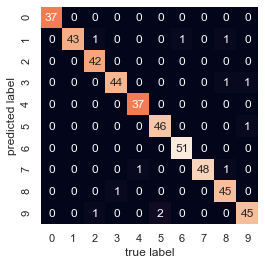

In [19]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)

plt.xlabel('true label')
plt.ylabel('predicted label');

In [20]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

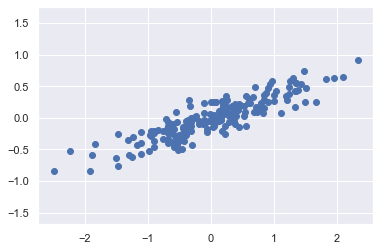

In [21]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [24]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [25]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [26]:
def draw_vectors(v0, v1, ax = None):
    ax = ax or plt.gca()
    
    arrowprops = dict(arrowstyle = '->', linewidth = 2, shrinkA = 0, shrinkB = 0, color = 'black')
    ax.annotate('', v1, v0, arrowprops = arrowprops)

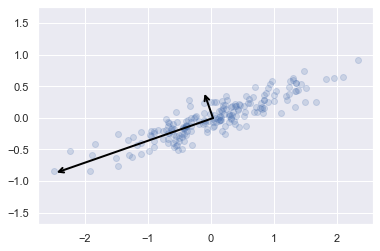

In [27]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vectors(pca.mean_, pca.mean_ + v)

plt.axis('equal');

In [28]:
pca = PCA(n_components = 1)
pca.fit(X)

PCA(n_components=1)

In [29]:
X_pca = pca.transform(X)

In [30]:
print(f'Original shape: {X.shape}')
print(f'Transformed shape {X_pca.shape}')

Original shape: (200, 2)
Transformed shape (200, 1)


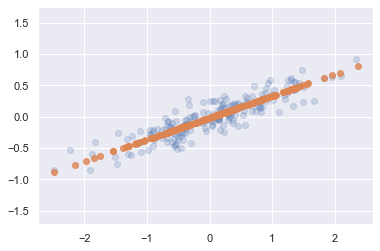

In [31]:
X_new = pca.inverse_transform(X_pca)

plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.8)
plt.axis('equal');

In [32]:
from sklearn.datasets import load_digits

In [33]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [34]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)

print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


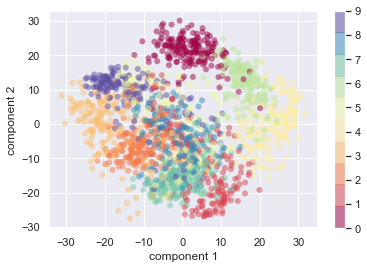

In [35]:
plt.scatter(projected[:, 0], projected[:, 1], c = digits.target, edgecolor = 'none', alpha = 0.5, 
            cmap = plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [36]:
pca = PCA().fit(digits.data)

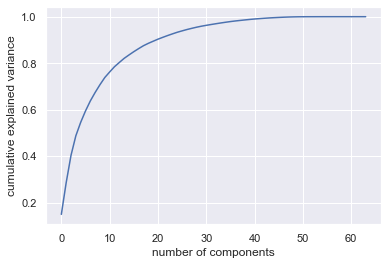

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [38]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize = (10, 4), subplot_kw = dict(xticks = [], yticks = []),
                            gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap = 'binary', interpolation = 'nearest', clim = (0, 16))

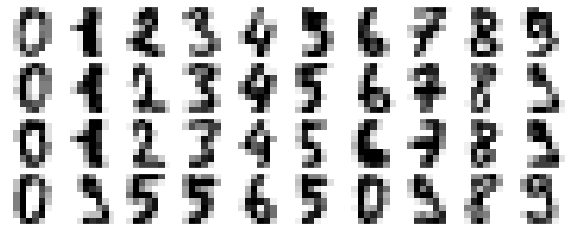

In [39]:
plot_digits(digits.data);

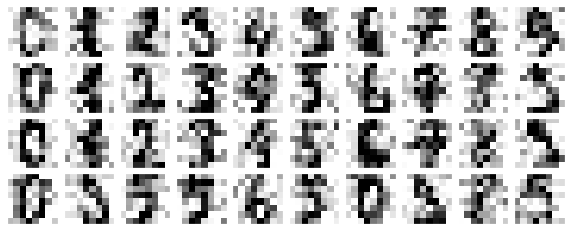

In [40]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy);

In [41]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

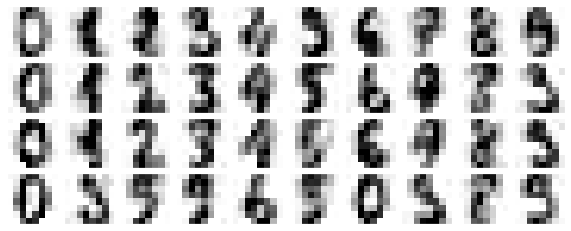

In [42]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered);

In [43]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [44]:
r_pca = PCA(n_components = 150, svd_solver = 'randomized')
r_pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

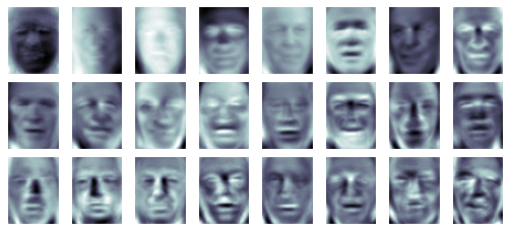

In [45]:
fig, axes = plt.subplots(3, 8, figsize = (9, 4), subplot_kw = dict(xticks = [], yticks = []), 
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(r_pca.components_[i].reshape(62, 47), cmap = 'bone');

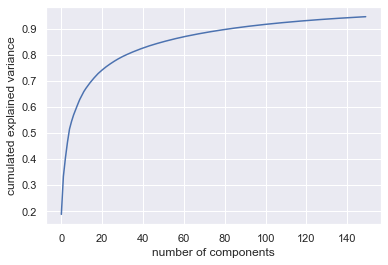

In [46]:
plt.plot(np.cumsum(r_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulated explained variance');

In [47]:
r_pca = PCA(n_components = 150, svd_solver = 'randomized').fit(faces.data)

In [48]:
components = r_pca.transform(faces.data)
projected = r_pca.inverse_transform(components)

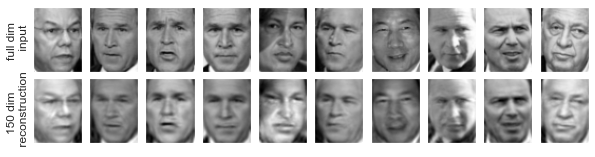

In [51]:
fig, ax = plt.subplots(2, 10, figsize = (10, 2.5), subplot_kw = dict(xticks = [], yticks = []), 
                      gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap = 'binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap = 'binary_r')
    
ax[0, 0].set_ylabel('full dim \n input')
ax[1, 0].set_ylabel('150 dim \n reconstruction');

In [53]:
def make_hello(N = 1000, rseed = 42):
    #Make a plot with HELLO text, save as png
    fig, ax = plt.subplots(figsize = (4, 1), gridspec_kw = dict(left = 0, right = 1, bottom = 0, top = 1))
    
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va = 'center', ha = 'center', weight = 'bold', size = 85)
    fig.savefig('data\hello.png')
    plt.close(fig)
    
    from matplotlib.image import imread
    
    data = imread('data\hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

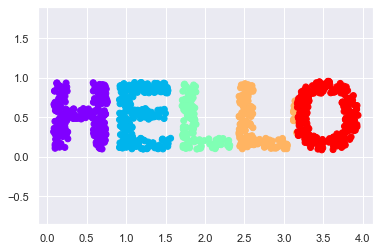

In [54]:
X = make_hello(1000)
colorize = dict(c = X[:, 0], cmap = plt.cm.get_cmap('rainbow', 5))

plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [55]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

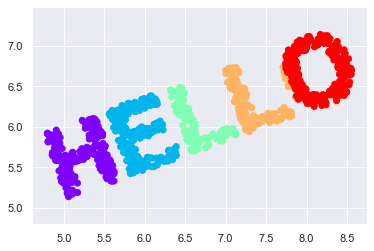

In [56]:
X2 = rotate(X, 20) + 5

plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

In [57]:
from sklearn.metrics import pairwise_distances

D = pairwise_distances(X)
D.shape

(1000, 1000)

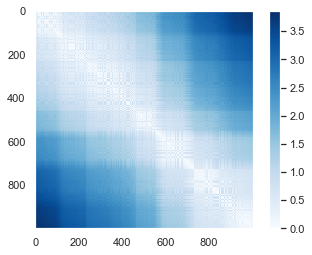

In [58]:
plt.imshow(D, zorder = 2, cmap = 'Blues', interpolation = 'nearest')
plt.colorbar();

In [59]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

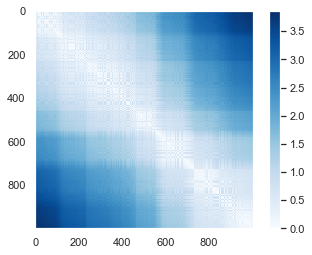

In [60]:
plt.imshow(D2, zorder = 2, interpolation = 'nearest', cmap = 'Blues')
plt.colorbar();

In [61]:
from sklearn.manifold import MDS

model = MDS(n_components = 2, dissimilarity = 'precomputed', random_state = 1)
out = model.fit_transform(D)

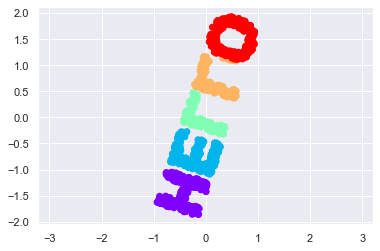

In [62]:
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');